In [17]:
import keras
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import pandas as pd
import matplotlib.pyplot as plt

In [18]:
housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

print("X_train: ",X_train.shape)
print("X_test: ",X_test.shape)
print("X_valid: ",X_valid.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)
print("y_valid: ",y_valid.shape)

X_train:  (11610, 8)
X_test:  (5160, 8)
X_valid:  (3870, 8)
y_train:  (11610,)
y_test:  (5160,)
y_valid:  (3870,)


In [19]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
X_valid = scaler.fit_transform(X_valid)


In [20]:
model = keras.models.Sequential([
    keras.layers.Dense(32, activation='relu',),
    keras.layers.Dense(16, activation='relu',),
    keras.layers.Dense(1)
])

In [23]:
model.compile(loss='mean_squared_error',
              optimizer='sgd',
              metrics=[
                  keras.metrics.RootMeanSquaredError(),
                  'mean_absolute_percentage_error'
              ])

In [24]:
history = model.fit(X_train,y_train,
                    epochs=10,
                    validation_data=(X_valid,y_valid))

Epoch 1/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.5865 - mean_absolute_percentage_error: 49.1568 - root_mean_squared_error: 1.2219 - val_loss: 0.5810 - val_mean_absolute_percentage_error: 31.9692 - val_root_mean_squared_error: 0.7622
Epoch 2/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5185 - mean_absolute_percentage_error: 30.8163 - root_mean_squared_error: 0.7199 - val_loss: 0.5103 - val_mean_absolute_percentage_error: 32.9457 - val_root_mean_squared_error: 0.7144
Epoch 3/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4421 - mean_absolute_percentage_error: 27.5145 - root_mean_squared_error: 0.6648 - val_loss: 0.5560 - val_mean_absolute_percentage_error: 34.3926 - val_root_mean_squared_error: 0.7457
Epoch 4/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4292 - mean_absolute_percentage_error: 26.8127 - root_mean_squared_error: 0.6549 - val_loss: 0.6348 - val_mean_absolute_percentage_error: 37.1163 - val_root_mean_squared_error: 0.7967
Epoch 5/10
363/3

<Axes: >

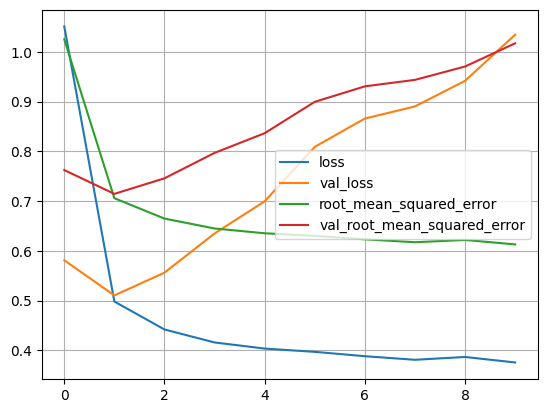

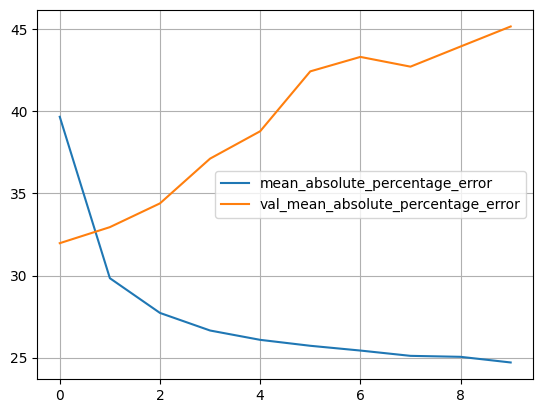

In [25]:
dfHistory = pd.DataFrame(history.history)
dfHistory[['loss','val_loss',
           'root_mean_squared_error', 'val_root_mean_squared_error',
           ]].plot(grid=True)
dfHistory[['mean_absolute_percentage_error', 'val_mean_absolute_percentage_error']].plot(grid=True)


In [26]:
loss, RMSE, MAPE = model.evaluate(X_train, y_train)
print("Evaluar el modelo en el conjunto de entrenamiento")
print("loss train: ", loss)
print("root mean squared error: ", RMSE)
print("Mean absolute percetage error: ", MAPE)

loss, RMSE, MAPE = model.evaluate(X_valid, y_valid)
print("Evaluar el modelo en el conjunto de validacion")
print("loss train: ", loss)
print("root mean squared error: ", RMSE)
print("Mean absolute percetage error: ", MAPE)

loss, RMSE, MAPE = model.evaluate(X_test, y_test)
print("Evaluar el modelo en el conjunto de prueba")
print("loss train: ", loss)
print("root mean squared error: ", RMSE)
print("Mean absolute percetage error: ", MAPE)

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3762 - mean_absolute_percentage_error: 24.6422 - root_mean_squared_error: 0.6133
Evaluar el modelo en el conjunto de entrenamiento
loss train:  0.3807547688484192
root mean squared error:  0.6170532703399658
Mean absolute percetage error:  24.493268966674805
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0100 - mean_absolute_percentage_error: 45.2026 - root_mean_squared_error: 1.0041
Evaluar el modelo en el conjunto de validacion
loss train:  1.0343210697174072
root mean squared error:  1.017015814781189
Mean absolute percetage error:  45.162025451660156
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4340 - mean_absolute_percentage_error: 26.6435 - root_mean_squared_error: 0.6586
Evaluar el modelo en el conjunto de prueba
loss train:  0.43633347749710083
root mean squared error:  0.6605554223060608
Mean absolute percetage error:  26.416593551635742
